<img src="https://cs7.pikabu.ru/post_img/2014/03/10/4/1394427243_1353289544.jpg" height="400" width="400"> 

# <center> ML для маркетинга. <br>  <br> Cюжетная арка 2: отток и привлечение </center>

В этом семестре мы с вами пройдём через несколько сюжетных арок. Второй такой аркой будут отток и привлечение. Им будет посвящена вторая серия из семинаров и домашек. 

В домашке мы поработаем с немного другой задачей классификации. Она будет связана с оттоком и превлечением клиентов. Будет весело __(но это неточно)__! 

## Задача:

В наших руках оказались [данные со статистикой скачки мобильных приложений из Appstore.](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home) Предположим, что мы хотим запилить своё собственное приложение и заработать на нём денег. Чтобы успешно монетизироваться, нам нужно много пользователей. Возникает задача их привлечения и последущего удержания.

Для того, чтобы наше приложение привлекло много пользователей, хочется, чтобы у него были высокие рейтинги. В этой тетрадке мы попробуем обучить модель, которая будет предсказывать рейтинг приложения по его параметрам. С помощью этой модели мы сможем посмотреть на то, на какие факторы имеет смысл обращать внимание в первую очередь, а также мы посмотрим как именно долгосрочный рейтиг (удержание) отличается от краткосрочного (привлечение). 


#  Часть II (Две модели) 

In [1]:
# Как обычно, для начала подгружаем нужные нам пакеты
import pandas as pd    # пакет для работы с таблицами 
import numpy as np     # пакет для работы с матрицами 

# пакеты для картиночек 
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

В прошлой тетрадке мы с вами создали нечто прекрасное. Мы создали выборку, на основе которой мы будем пытаться предсказать популярность приложения. 

__[1]__ Подгрузить тренировочную выборку. Если вы балбес и криво сделали предыдущую домашку, тогда

* выбросите все переменные типа `object` и оставьте только численные. Возможно, при оценивании модели у вас возникнут разные другие проблемы. С ними вам придётся бороться прямо в этой тетрадке. Понять какие переменные надо выкинуть поможет `df.info()`. 
* проконтролируйте, что переменные `is_popular` и `is_small` никуда не выкинулись. 

In [2]:
df = pd.read_csv('../sem5_classification/apple_train.csv', sep='\t')
df.head()

,size_bytes,price,sup_devices.num,ipadSc_urls.num,lang.num,is_popular,is_small,is_for_free,is_multilingual,len_of_name,...,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,prime_genre_another
0,16.614936,1.383791,37,0,4,0,1,0,0,21,...,0,0,0,0,0,0,0,0,0,0
1,17.928492,0.000000,24,3,1,0,1,1,0,18,...,0,1,0,0,0,0,0,0,0,0
2,18.972127,0.000000,38,5,1,1,0,1,0,11,...,0,0,0,0,0,0,0,0,0,0
3,18.375722,0.688135,40,5,14,1,0,0,1,11,...,0,0,0,0,0,0,0,0,0,0
4,17.139794,0.000000,37,5,1,0,0,1,0,47,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5757 entries, 0 to 5756
Data columns (total 35 columns):
size_bytes                       5757 non-null float64
price                            5757 non-null float64
sup_devices.num                  5757 non-null int64
ipadSc_urls.num                  5757 non-null int64
lang.num                         5757 non-null int64
is_popular                       5757 non-null int64
is_small                         5757 non-null int64
is_for_free                      5757 non-null int64
is_multilingual                  5757 non-null int64
len_of_name                      5757 non-null int64
len_of_desc                      5757 non-null int64
there_is_a_discount              5757 non-null int64
is_short_name                    5757 non-null int64
cont_rating_17+                  5757 non-null int64
cont_rating_4+                   5757 non-null int64
cont_rating_9+                   5757 non-null int64
prime_genre_Education            5757 non

* Если будете выуидывать переменные, можно построить корреляционную матрицу и увидеть какие факторы сильнее всего коррелируют между собой. 

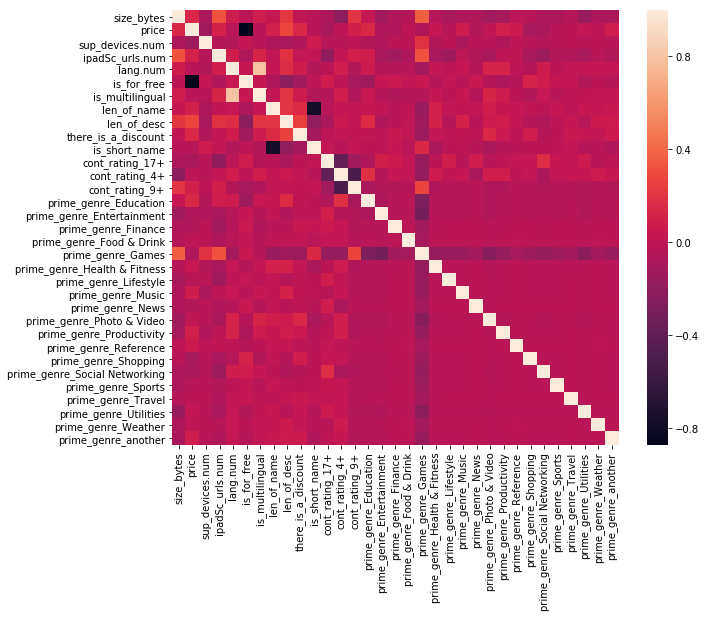

In [4]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(['is_popular', 'is_small'], axis=1).corr());

Вытащите в переменную $y$ колонку `is_popular`. В переменную $X$ вытащите всё, кроме колонок `is_popular` и `is_small`. в переменную `features` вытащите названия столбцов (всех, кроме `is_popular` и `is_small`).

In [5]:
y = df.is_popular.get_values()
X = df.drop(['is_popular', 'is_small'], axis=1).get_values()
features = list(df.drop(['is_popular', 'is_small'], axis=1).columns)

In [6]:
y[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [7]:
X[:2]

array([[1.66149360e+01, 1.38379123e+00, 3.70000000e+01, 0.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10000000e+01,
        1.17600000e+03, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.79284921e+01, 0.00000000e+00, 2.40000000e+01, 3.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.80000000e+01,
        7.49000000e+02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,

In [8]:
features

['size_bytes',
 'price',
 'sup_devices.num',
 'ipadSc_urls.num',
 'lang.num',
 'is_for_free',
 'is_multilingual',
 'len_of_name',
 'len_of_desc',
 'there_is_a_discount',
 'is_short_name',
 'cont_rating_17+',
 'cont_rating_4+',
 'cont_rating_9+',
 'prime_genre_Education',
 'prime_genre_Entertainment',
 'prime_genre_Finance',
 'prime_genre_Food & Drink',
 'prime_genre_Games',
 'prime_genre_Health & Fitness',
 'prime_genre_Lifestyle',
 'prime_genre_Music',
 'prime_genre_News',
 'prime_genre_Photo & Video',
 'prime_genre_Productivity',
 'prime_genre_Reference',
 'prime_genre_Shopping',
 'prime_genre_Social Networking',
 'prime_genre_Sports',
 'prime_genre_Travel',
 'prime_genre_Utilities',
 'prime_genre_Weather',
 'prime_genre_another']

Разбейте выборку $X, y$  на тренировочную и валидационную. 

In [9]:
from sklearn.model_selection import train_test_split
Xtr, Xval, ytr, yval = train_test_split(X,y, test_size=0.2, stratify=y)

__[2]__ Оцените логистическую регрессию. Она будет стараться предсказать станет ли приложение популярным или нет по всей выборке. 

In [10]:
from sklearn.linear_model import LogisticRegression

# class_weight='balanced' введёт в logloss штрафы за дисбаланс в классах 
# прямо как в задаче про Винни-Пуха из семинара! 
# это немного улучшит качество модели :) 
model = LogisticRegression(class_weight='balanced')
model.fit(Xtr, ytr)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

__[1]__ Каким получился на валидационной выборке `roc_auc`? Каким получилось `accuracy`?

In [11]:
p_pred = model.predict_proba(Xval)[:,-1]
y_pred = model.predict(Xval)

In [12]:
from sklearn.metrics import roc_auc_score, accuracy_score
accuracy_score(yval, y_pred)

0.5746527777777778

In [13]:
roc_auc_score(yval, y_pred)

0.585909070041471

Что вообще такое `accuracy` и `roc_auc`? Если забыли, найдите в материалах первого семестра pdf и прочитайте! Можно ли в нашем случае доверять этим метрика `accuracy` (вспомните про дисабаланс)? 

__Ответ:__  Обе эти метрики очень чуствительны к дисбалансу в выборке. У нас есть небольшой дисбаланс. Из-за этого на  accuracy должен быть больше $0.66$, если мы хотим, чтобы модель имела смысл.  Больше $0.66$, так как если мы будем говорить, что все приложения окажутся неуспешными, то есть $\hat y=0$, мы будем правы в 66% случаев. Правда эти нули нам вообще ничего не дают, потому что мы хотим искать успешные приложения! 

In [14]:
np.mean(y)

0.4384227896473858

ROC AUC подходит для нашей задачи лучше.  В хороших моделях она должна оказываться больше $0.5$. Однако, если в выборке есть слишком большой дисабаланс, эта метрика тоже коазывается неадекватной. У нас дисбаланс не особо большой, поэтому можем со спокойной душой использовать её.

__[1]__ Вытащите из модели коэффициенты. Постройте картинку, на которой по оси $x$ будут отложены названия фичей, а по оси $y$ будут значения коэффициентов (как на паре). Какие переменные негативнее всего влияют на популярность? Какие позитивнее всего влияют на популярность? 

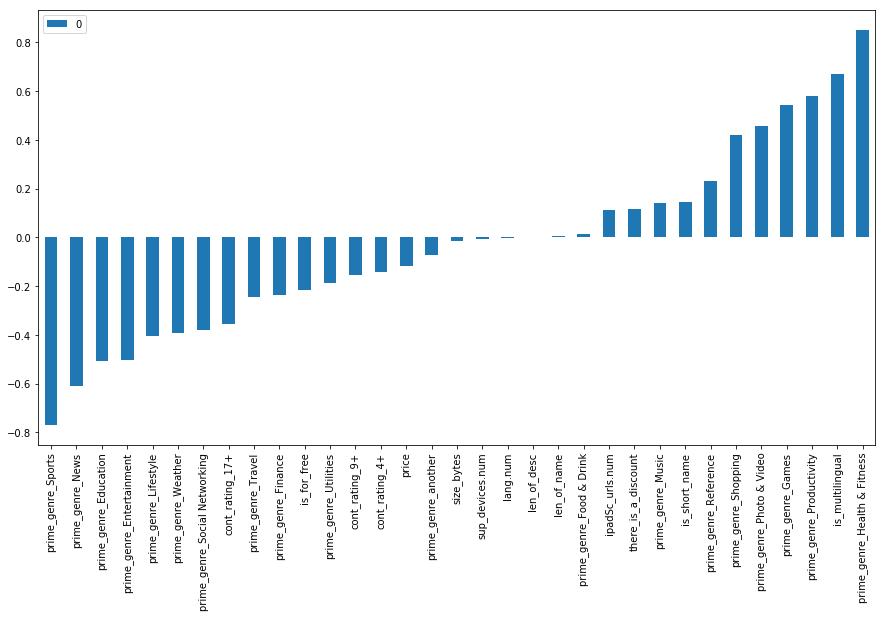

In [15]:
coefs = model.coef_[0]
df_coef = pd.DataFrame(coefs, features)
df_coef.sort_values(0).plot(kind='bar', figsize=(15,8));

__[1]__ У Даши есть теория. 

> У меня есть теория, что люди больше доверяют приложениям, у которых очень длинное описание, чем тем, у которых короткое, потому что из короткого мало что можно понять о приложении, в коротком описании не перечислены всякие awards и т.д. 

Правда ли это? 

In [16]:
df_coef.loc['len_of_desc'] # коэффициент положительный, но близко к нулю

0    0.000176
Name: len_of_desc, dtype: float64

__Ответ:__  Судя по всему, это неправда, при огромном числе факторов, которое мы включили в модель, коэффициент перед длинной описания оказался близок к нулю. Вообще говоря, тут нам мало посмотреть просто на величину коэффициента. Нужно проверять гипотезу о том, что он не вносит никакого вклада. В этом помогают матстат и эконометрика. 

Тем не менее, даже если окажется, что вклад от этого фактора есть, он будет не очень существенным. Кажется, что Даша ошиблась. :) 

------------------

Возможно, что факторы, которые есть у нас в выборке, по-разному влияют на популярность наших приложений на разных этапах их жизни. Когда приложение маленькое, надо обращать внимание на одни штуки, когда оно становится большим, на другие. Давайте попробуем проверить это. 

__[1]__  Разбейте исходную выборку на две части. Там, где `is_small` принимает значение $1$ запишите в `X_small`, `y_small`. Там, где `is_small` принимает значение $0$ запишите в `X_large` и `y_large`. Разбейте обе выборки на трэйн и валидацию. 

In [17]:
y_small = df[df.is_small == 1].is_popular.get_values()
y_large = df[df.is_small == 0].is_popular.get_values()

X_small = df[df.is_small == 1].drop(['is_popular', 'is_small'], axis=1).get_values()
X_large = df[df.is_small == 0].drop(['is_popular', 'is_small'], axis=1).get_values()

In [18]:
X_small_tr, X_small_val, y_small_tr, y_small_val  = train_test_split(X_small, y_small, 
                                                                     test_size=0.2, stratify=y_small)

X_large_tr, X_large_val, y_large_tr, y_large_val  = train_test_split(X_large, y_large,
                                                                     test_size=0.2, stratify=y_large)

__[1]__  Оцените две логистические регрессии. Одну для большой выборки, одну для маленькой. Какое у этих моделей получилось качество? 

In [19]:
model_small = LogisticRegression(class_weight='balanced')
model_small.fit(X_small_tr, y_small_tr)

model_large = LogisticRegression(class_weight='balanced')
model_large.fit(X_large_tr, y_large_tr)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

__[1]__ Постройте для обеих моделей картинки с важностью коэффициентов. 

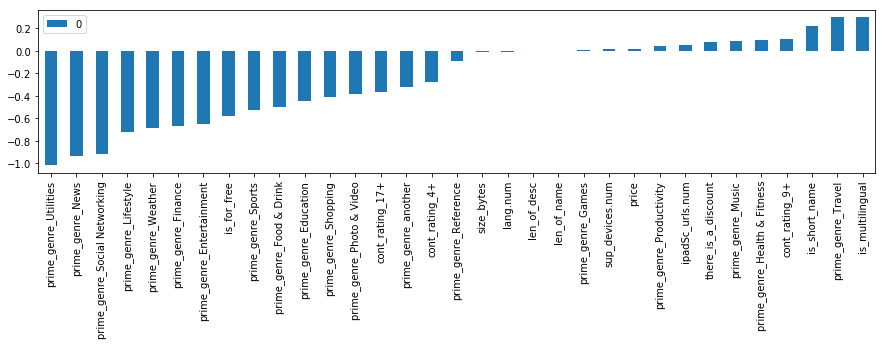

In [20]:
coefs = model_small.coef_[0]
df_coef = pd.DataFrame(coefs, features)
df_coef.sort_values(0).plot(kind='bar', figsize=(15,3));

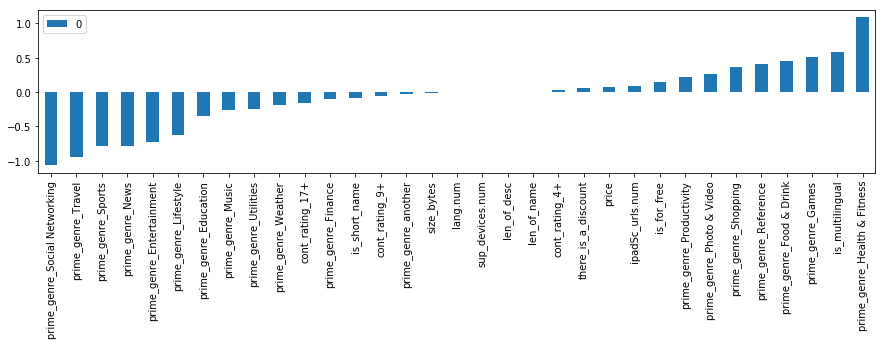

In [21]:
coefs = model_large.coef_[0]
df_coef = pd.DataFrame(coefs, features)
df_coef.sort_values(0).plot(kind='bar', figsize=(15,3));

__[1]__ Остался последний шаг. Интерпретация результата. 

__Тут мы неявно подразумеваем, что если клиенты ставят приложению много звёзд, они привлекаются и удерживаются.__

Правда ли, что формирование рейтинга у приложений-новичков отличается от формирования рейтинга у старичков? 

__Ответ:__  Да, это правда. На получившихся картинках ма чётко видим, что факторы, которые вносят в популярность приложения вклад при запуске довольно сильно отличаются от факторов, которые вносят вклад в его популярность в долгосрочной перспективе. Например: 

   - `is_for_free` когда приложение только запустилось, если оно бесплатное, рейтинг у него в среднем ниже, а если оно уже довольно давно работает на рынке, наоборот фает бесплатности даёт буст в звёздочках. Скорее всего, так происходит из-за того, что довольно просто понять, что приложение отстойное если оно бесплатное. 
   - Довольно забавно, что при запуске приложения про путешествия получают больше звезд. Но в долгосрочном периоде, этот жанр наоборот отбирает у приложения звёзды. Возможно, что такие приложения быстро надоедают людям. Если жарн приложения - игры, то мы, наоборот, видим, положительный вклад в рейтинг в обеих ситуациях. С жанрами можно увидеть ещё довольно много интересных закономерностей. 
   - `is_short_name`, которую мы ввели, думая что у приложений с короткими названиями больше популярность тоже показывает себя интересным образом. Поначалу она даёт вклад в популярность, но в долгосрочном периоде этот вклад исчезает и становится практически нулевым. Даже немног отрицательным (тут надо гипотезу проверять матстатом, что он нулевой). 

Предположим, что ваш друг решил запустить своё приложение. На что он должен в превую очередь обратить внимание, чтобы привлечь клиентов? 

__Ответ:__ Наверное, нужно выбрать удачный жанр, который не загубит наше дело. Подумать о названии... 

На что имеет смысл обратить внимание, если он хочет не только привлечь клиентов, но и удержать их в долгосрочном периоде? 

__Ответ:__ Снова важен жанр. Надо попытаться оставаться на плаву. Если выбран не самый удачный жанр, надо дополнительно провести исследования, почему люди к нему так негативно относятся.  Кстати говоря, [в выборке про приложения](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/version/2) уже накопилось около $10000$ наблюдений. А мы в домашке использовали вариант из $3000$. Можно расширить выборку и посмотреть сохраняются ли найденные закономерности на более большом объёме данных. 

Ещё обратите внимание, что по этому датасету есть [много красивых тетрадок и визуализаций.](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/version/2/kernels) Всё на питоне. Посмотрите на досуге, если вас цепанул этот датасет.



